In [1]:
from multiprocessing import Pool

def create_lag(df_code,n_lag=[3,7,14,],shift_size=1):
    code = df_code['assetCode'].unique()
    
    for col in return_features:
        for window in n_lag:
            rolled = df_code[col].shift(shift_size).rolling(window=window)
            lag_mean = rolled.mean()
            lag_max = rolled.max()
            lag_min = rolled.min()
            lag_std = rolled.std()
            df_code['%s_lag_%s_mean'%(col,window)] = lag_mean
            df_code['%s_lag_%s_max'%(col,window)] = lag_max
            df_code['%s_lag_%s_min'%(col,window)] = lag_min
#             df_code['%s_lag_%s_std'%(col,window)] = lag_std
    return df_code.fillna(-1)

def generate_lag_features(df,n_lag = [3,7,14]):
    features = ['time', 'assetCode', 'assetName', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'universe']
    
    assetCodes = df['assetCode'].unique()
    print(assetCodes)
    all_df = []
    df_codes = df.groupby('assetCode')
    df_codes = [df_code[1][['time','assetCode']+return_features] for df_code in df_codes]
    print('total %s df'%len(df_codes))
    
    pool = Pool(4)
    all_df = pool.map(create_lag, df_codes)
    
    new_df = pd.concat(all_df)  
    new_df.drop(return_features,axis=1,inplace=True)
    pool.close()
    
    return new_df

def mis_impute(data):
    for i in data.columns:
        if data[i].dtype == "object":
            data[i] = data[i].fillna("other")
        elif (data[i].dtype == "int64" or data[i].dtype == "float64"):
            data[i] = data[i].fillna(data[i].mean())
        else:
            pass
    return data

def data_prep(market_train):
    lbl = {k: v for v, k in enumerate(market_train['assetCode'].unique())}
    market_train['assetCodeT'] = market_train['assetCode'].map(lbl)
    market_train = market_train.dropna(axis=0)
    return market_train

fcol=['volume', 'close', 'open', 'returnsClosePrevRaw1', 'returnsOpenPrevRaw1', 'returnsClosePrevMktres1', 'returnsOpenPrevMktres1', 'returnsClosePrevRaw10', 'returnsOpenPrevRaw10', 'returnsClosePrevMktres10', 'returnsOpenPrevMktres10', 'returnsClosePrevMktres10_lag_3_mean', 'returnsClosePrevMktres10_lag_3_max', 'returnsClosePrevMktres10_lag_3_min', 'returnsClosePrevMktres10_lag_7_mean', 'returnsClosePrevMktres10_lag_7_max', 'returnsClosePrevMktres10_lag_7_min', 'returnsClosePrevMktres10_lag_14_mean', 'returnsClosePrevMktres10_lag_14_max', 'returnsClosePrevMktres10_lag_14_min', 'returnsClosePrevRaw10_lag_3_mean', 'returnsClosePrevRaw10_lag_3_max', 'returnsClosePrevRaw10_lag_3_min', 'returnsClosePrevRaw10_lag_7_mean', 'returnsClosePrevRaw10_lag_7_max', 'returnsClosePrevRaw10_lag_7_min', 'returnsClosePrevRaw10_lag_14_mean', 'returnsClosePrevRaw10_lag_14_max', 'returnsClosePrevRaw10_lag_14_min', 'open_lag_3_mean', 'open_lag_3_max', 'open_lag_3_min', 'open_lag_7_mean', 'open_lag_7_max', 'open_lag_7_min', 'open_lag_14_mean', 'open_lag_14_max', 'open_lag_14_min', 'close_lag_3_mean', 'close_lag_3_max', 'close_lag_3_min', 'close_lag_7_mean', 'close_lag_7_max', 'close_lag_7_min', 'close_lag_14_mean', 'close_lag_14_max', 'close_lag_14_min', 'assetCodeT']

In [7]:
import pandas as pd
import numpy as np

In [8]:
market_test_df = pd.read_csv("../../data/market_test_df.csv").drop('Unnamed: 0', axis=1)
market_test_df['time'] = pd.to_datetime(market_test_df['time'])

In [9]:
dates = market_test_df['time'].unique()
market_test_df[market_test_df['time'] == dates[0]].tail()

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
875,2016-10-13 22:00:00,ZION.O,Zions Bancorp,3041647.0,30.36,30.78,-0.027235,-0.017241,-0.023449,-0.014122,-0.005242,-0.004528,0.004824,0.015436,0.060453,1.0
876,2016-10-13 22:00:00,ZIOP.O,ZIOPHARM Oncology Inc,1042606.0,5.22,5.19,-0.003817,-0.038889,0.007138,-0.026353,-0.064516,-0.115843,-0.060812,-0.105750,0.034282,0.0
877,2016-10-13 22:00:00,ZLTQ.O,ZELTIQ Aesthetics Inc,358309.0,40.83,40.00,0.012649,-0.003736,0.017270,-0.001255,0.064113,0.013942,0.059521,0.005566,-0.189523,0.0
878,2016-10-13 22:00:00,ZNGA.O,Zynga Inc,13474904.0,2.90,2.91,-0.013605,0.003448,-0.008828,0.006002,0.032028,0.024648,0.022769,0.002984,-0.039757,1.0
879,2016-10-13 22:00:00,ZTS.N,Zoetis Inc,2812177.0,51.02,51.13,-0.007779,0.001960,-0.003743,0.006036,0.000000,-0.011790,0.011654,0.008790,-0.046295,1.0


In [2]:
import pickle as pk
_ref_models = pk.load(open("../pickle/_ref_models.pkl","rb"))

/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [7]:
# load models
gbm_1 = _ref_models[0]
gbm_2 = _ref_models[1]
gbm_3 = _ref_models[2]
gbm_4 = _ref_models[3]
gbm_5 = _ref_models[4]
gbm_6 = _ref_models[5]

In [3]:
mins,maxs,rng = pk.load(open("../pickle/normalizing.pkl","rb"))

In [38]:
import time

PREDICTIONS = []

#artificial prediction
#days = env.get_prediction_days()
days = []
for date in dates:
    market_obs_df = market_test_df[market_test_df['time'] == date]
    predictions_template_df = pd.DataFrame({'assetCode':market_test_df[market_test_df['time'] == date]['assetCode'],
                                            'confidenceValue':0.0})
    days.append([market_obs_df,None,predictions_template_df])
 

n_days = 0
n_lag=[3,7,14]
prep_time = 0
prediction_time = 0
packaging_time = 0
total_market_obs_df = []
for (market_obs_df, news_obs_df, predictions_template_df) in days[:5]:
    n_days +=1
    if (n_days%50==0):
        pass
        #print(n_days,end=' ')
    t = time.time()
    market_obs_df['time'] = market_obs_df['time'].dt.date
    
    return_features = ['returnsClosePrevMktres10','returnsClosePrevRaw10','open','close']
    total_market_obs_df.append(market_obs_df)
    if len(total_market_obs_df)==1:
        history_df = total_market_obs_df[0]
    else:
        history_df = pd.concat(total_market_obs_df[-(np.max(n_lag)+1):])
    new_df = generate_lag_features(history_df,n_lag=[3,7,14])
    market_obs_df = pd.merge(market_obs_df,new_df,how='left',on=['time','assetCode'])
    market_obs_df = mis_impute(market_obs_df)
    market_obs_df = data_prep(market_obs_df)
    
    X_live = market_obs_df[fcol].values
    X_live = 1 - ((maxs - X_live) / rng)
    prep_time += time.time() - t
    t = time.time()
    lp = (gbm_1.predict(X_live) + gbm_2.predict(X_live)+gbm_3.predict(X_live)+gbm_4.predict(X_live)+gbm_5.predict(X_live)+gbm_6.predict(X_live))/6
    prediction_time += time.time() -t
    t = time.time()
    confidence = lp
    confidence = (confidence-confidence.min())/(confidence.max()-confidence.min())
    #print("max_min_predict",max_min_predict)
    confidence = confidence * 2 - 1
    preds = pd.DataFrame({'assetCode':market_obs_df['assetCode'],'confidence':confidence})
    predictions_template_df = predictions_template_df.merge(preds,how='left').drop('confidenceValue',axis=1).fillna(0).rename(columns={'confidence':'confidenceValue'})
    PREDICTIONS.append(predictions_template_df)
    packaging_time += time.time() - t
    
#env.write_submission_file()
#sub  = pd.read_csv("submission_versionnew.csv")

/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['LGIH.O' 'LGND.O' 'LH.N' 'LHO.N' 'LII.N' 'LILA.O' 'LILAK.O' 'LITE.O'
 'LIVN.O' 'LKQ.O' 'LLTC.O' 'LLY.N' 'LM.N' 'LMCK.O' 'LMNX.O' 'LMT.N' 'LN.N'
 'LNC.N' 'LNCE.O' 'LNG.A' 'LNKD.N' 'LNT.N' 'LOCK.N' 'LOGI.O' 'LOGM.O'
 'LOPE.O' 'LOW.N' 'LPI.N' 'LPL.N' 'LPLA.O' 'LPNT.O' 'LPT.N' 'LPX.N' 'LQ.N'
 'LRCX.O' 'LSCC.O' 'LSI.N' 'LSTR.O' 'LSXMA.O' 'LSXMK.O' 'LTRPA.O' 'LTXB.O'
 'LUK.N' 'LULU.O' 'LUV.N' 'LVLT.N' 'LVS.N' 'LXK.N' 'LXP.N' 'LXRX.O'
 'LYB.N' 'LYG.N' 'LYV.N' 'LZB.N' 'M.N' 'MA.N' 'MAA.N' 'MAC.N' 'MAN.N'
 'MANH.O' 'MAR.O' 'MAS.N' 'MASI.O' 'MAT.O' 'MBFI.O' 'MBI.N' 'MBT.N'
 'MCD.N' 'MCHP.O' 'MCK.N' 'MCO.N' 'MD.N' 'MDC.N' 'MDCO.O' 'MDLZ.O' 'MDP.N'
 'MDRX.O' 'MDSO.O' 'MDT.N' 'MDU.N' 'MDXG.O' 'MEG.N' 'MELI.O' 'MENT.O'
 'MEOH.O' 'MET.N' 'MFA.N' 'MFC.N' 'MFS.N' 'MGA.N' 'MGLN.O' 'MGM.N'
 'MGNX.O' 'MGP.N' 'MHK.N' 'MHLD.O' 'MIC.N' 'MIDD.O' 'MIK.O' 'MINI.O'
 'MITL.O' 'MJN.N' 'MKC.N' 'MKSI.O' 'MKTX.O' 'MLHR.O' 'MLM.N' 'MLNX.O'
 'MMC.N' 'MMM.N' 'MMP.N' 'MMS.N' 'MMSI.O' 'MNK.N' 'MNR.N' 'MNRO.O'
 'MNST.O' '

In [15]:
PREDICTIONS[0]
df_X_live = 1 - ((maxs - market_obs_df[fcol]) / rng)

In [37]:
pk.dump(df_X_live, open("../pickle/_ref_rolling_dataset_1.pkl","wb"))

In [24]:
df_X_live.tail()

,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,...,close_lag_3_mean,close_lag_3_max,close_lag_3_min,close_lag_7_mean,close_lag_7_max,close_lag_7_min,close_lag_14_mean,close_lag_14_max,close_lag_14_min,assetCodeT
1838,0.002506,0.020561,0.003065,0.021347,0.005318,0.027004,0.004671,0.020404,0.004706,0.067685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.561564
1839,0.001910,0.003326,0.000522,0.020294,0.005440,0.025939,0.004732,0.018350,0.004399,0.065748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.561870
1840,0.000858,0.026310,0.004092,0.020278,0.005460,0.025929,0.004831,0.020646,0.005015,0.067426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.562175
1841,0.026670,0.001856,0.000283,0.020623,0.005327,0.026275,0.004684,0.020080,0.004837,0.066765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.562481
1842,0.002891,0.033462,0.005109,0.020639,0.005330,0.026293,0.004676,0.019774,0.004691,0.067179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.562786


In [40]:
compare_X_live = pk.load(open('../pickle/rolling_dataset_1.pkl','rb'))

In [42]:
compare_X_live.tail()

,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,...,lag_3_close_mean,lag_3_close_max,lag_3_close_min,lag_7_close_mean,lag_7_close_max,lag_7_close_min,lag_14_close_mean,lag_14_close_max,lag_14_close_min,assetCodeT
1838,0.002506,0.020561,0.003065,0.021347,0.005318,0.027004,0.004671,0.020404,0.004706,0.067685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.561564
1839,0.001910,0.003326,0.000522,0.020294,0.005440,0.025939,0.004732,0.018350,0.004399,0.065748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.561870
1840,0.000858,0.026310,0.004092,0.020278,0.005460,0.025929,0.004831,0.020646,0.005015,0.067426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.562175
1841,0.026670,0.001856,0.000283,0.020623,0.005327,0.026275,0.004684,0.020080,0.004837,0.066765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.562481
1842,0.002891,0.033462,0.005109,0.020639,0.005330,0.026293,0.004676,0.019774,0.004691,0.067179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.562786


In [48]:
compare_X_live.iloc[0][0]

0.0011599427047023214

In [79]:
compare_X_live.columns[9], compare_X_live.columns[10], compare_X_live.columns[5], compare_X_live.columns[6]

('returnsClosePrevMktres10',
 'returnsOpenPrevMktres10',
 'returnsClosePrevMktres1',
 'returnsOpenPrevMktres1')

In [49]:
for i in range(len(df_X_live)):
    for j in range(len(df_X_live.iloc[i])):
        equal = df_X_live.iloc[i][j] == compare_X_live.iloc[i][j]
        if not equal:
            print("NOT EQUAL ON {} {}".format(i,j))
            print(df_X_live.iloc[i][j])
            print(compare_X_live.iloc[i][j])

NOT EQUAL ON 8 9
0.06736583038573696
0.06734593381749365
NOT EQUAL ON 8 10
0.014867325957504507
0.014865896674771673
NOT EQUAL ON 118 5
0.02659697260983085
0.026603590675826294
NOT EQUAL ON 118 6
0.004723669863732627
0.004707785826653765
NOT EQUAL ON 118 9
0.06736583038573696
0.06734593381749365
NOT EQUAL ON 118 10
0.014867325957504507
0.014865896674771673
NOT EQUAL ON 144 9
0.06736583038573696
0.06734593381749365
NOT EQUAL ON 144 10
0.014867325957504507
0.014865896674771673
NOT EQUAL ON 177 9
0.06736583038573696
0.06734593381749365
NOT EQUAL ON 177 10
0.014867325957504507
0.014865896674771673
NOT EQUAL ON 222 9
0.06736583038573696
0.06734593381749365
NOT EQUAL ON 222 10
0.014867325957504507
0.014865896674771673
NOT EQUAL ON 238 9
0.06736583038573696
0.06734593381749365
NOT EQUAL ON 238 10
0.014867325957504507
0.014865896674771673
NOT EQUAL ON 281 9
0.06736583038573696
0.06734593381749365
NOT EQUAL ON 281 10
0.014867325957504507
0.014865896674771673
NOT EQUAL ON 313 9
0.067365830385736

In [12]:
df_X_live = pk.load(open('../pickle/_ref_rolling_dataset_1.pkl','rb'))

In [14]:
df_X_live.iloc[8]

volume                                  0.000188
close                                   0.023846
open                                    0.003535
returnsClosePrevRaw1                    0.021341
returnsOpenPrevRaw1                     0.005282
returnsClosePrevMktres1                 0.026999
returnsOpenPrevMktres1                  0.004634
returnsClosePrevRaw10                   0.021011
returnsOpenPrevRaw10                    0.004846
returnsClosePrevMktres10                0.067366
returnsOpenPrevMktres10                 0.014867
returnsClosePrevMktres10_lag_3_mean     0.060072
returnsClosePrevMktres10_lag_3_max      0.019114
returnsClosePrevMktres10_lag_3_min      0.217383
returnsClosePrevMktres10_lag_7_mean     0.036780
returnsClosePrevMktres10_lag_7_max      0.000185
returnsClosePrevMktres10_lag_7_min      0.277212
returnsClosePrevMktres10_lag_14_mean    0.000000
returnsClosePrevMktres10_lag_14_max     0.000000
returnsClosePrevMktres10_lag_14_min     0.552971
returnsClosePrevRaw1

In [ ]:
8       ABCB.O  0.695615  0.696494
118     APFH.N -0.505888 -0.437336
144      ATR.N  0.166013  0.172895
177     BANR.O  0.586117  0.590670
222      BLD.N  0.567054  0.572736
238      BOX.N  0.678455  0.681280
313      CCU.N  0.073580  0.063046
420     CSTM.N  0.509296  0.494727
465      DDC.N  0.272437  0.251786
469      DEA.N  0.050674  0.029699
592      EVH.N  0.137207  0.137220
670     FRGI.O -0.323142 -0.322178
682      FUL.N -0.442546 -0.447138
702      GGG.N -0.207914 -0.219843
703      GHL.N -0.522267 -0.526471
761     HASI.N -0.148810 -0.159931
780      HII.N -0.344792 -0.237589
933      KNL.N -0.230580 -0.222746
1144     NEP.N -0.430391 -0.427869
1187    NVRO.N -0.308194 -0.235391
1233    OTEX.O  0.048668  0.051525
1390     RNR.N -0.527257 -0.535770
1407    RTRX.O -0.030127 -0.036894
1418    SAIC.N -0.472767 -0.476151
1423    SATS.O -0.260163 -0.181130
1507     SNX.N -0.351866 -0.266667
1513     SPB.N -0.030298 -0.039186
1526      SR.N -0.263508 -0.272651
1530     SRG.N -0.034596 -0.037471
1573    SYNT.O -0.198527 -0.207932
1638    TRNO.N -0.295412 -0.146239
1712     VAL.N  0.014393  0.005176
1729    VNDA.O  0.036533 -0.038312
1768     WES.N -0.122177 -0.152032
1782     WMS.N -0.131834 -0.149183

(Pdb) X_test.iloc[8]
volume                                  0.000188
close                                   0.023846
open                                    0.003535
returnsClosePrevRaw1                    0.021341
returnsOpenPrevRaw1                     0.005282
returnsClosePrevMktres1                 0.026999
returnsOpenPrevMktres1                  0.004634
returnsClosePrevRaw10                   0.021011
returnsOpenPrevRaw10                    0.004846
returnsClosePrevMktres10                0.067366

In [70]:
save_name = os.path.join("../pickle","rolling_predictions_dataset.pkl")
with open(save_name,"wb") as f:
    pk.dump(days, f)
    print("[_save] days to "+save_name)

[_save] days to ../pickle/rolling_predictions_dataset.pkl


In [72]:
save_name = os.path.join("../pickle","_ref_rolling_predictions.pkl")
with open(save_name,"wb") as f:
    if not PREDICTED:
        pk.dump(PREDICTIONS, f)
        print("[_save] rolling preds to PREDICTIONS")

[_save] rolling preds to PREDICTIONS


In [4]:
PREDICTED = True
if PREDICTED:
    import pickle as pk
    PREDICTIONS = pk.load(open("../pickle/_ref_rolling_predictions.pkl","rb"))

In [5]:
PRETRAINED = True
if PRETRAINED:
    import sys;sys.path.append('../')
    import os
    from model_lgbm_71 import model
    os.listdir('../pickle')
    model = model('DecisionTree.model_lgbm_71')
    model._load()
    print(help(model.predict))


init model DecisionTree.model_lgbm_71
[_load] models loaded succesfully
Help on method predict in module model_lgbm_71:

predict(X, verbose=False, do_shap=False, normalize=True, normalize_vals=[None]) method of model_lgbm_71.model instance
    given a block of X features gives prediction for everyrow+".pkl"
    
    Args:
        X: [market_train_df, news_train_df]
        shap: perform shap analysis
        normalize: (bool)
        normalize_vals: recommmended self.maxs, self.mins
    Returns:
        y: pandas.Series

None


In [10]:
#prediction
import time

_COMPARE_PREDICTIONS = []

days = []
for date in dates:
    market_obs_df = market_test_df[market_test_df['time'] == date]
    predictions_template_df = pd.DataFrame({'assetCode':market_test_df[market_test_df['time'] == date]['assetCode'],
                                            'confidenceValue':0.0})
    days.append([market_obs_df,None,predictions_template_df])

#days = env.get_prediction_days()
# SHOULD WORK?
n_days = 0
prep_time = 0
prediction_time = 0
n_lag=[3,7,14]
packaging_time = 0
total_market_obs_df = []
for (market_obs_df, news_obs_df, predictions_template_df) in days[:]:
    n_days +=1
    if (n_days%50==0):
        pass
        #print(n_days,end=' ')
    t = time.time()
    market_obs_df['time'] = market_obs_df['time'].dt.date

    total_market_obs_df.append(market_obs_df)
    if len(total_market_obs_df)==1:
        history_df = total_market_obs_df[0]
    else:
        history_df = pd.concat(total_market_obs_df[-(np.max(n_lag)+1):])
        
    
    confidence = model.predict_rolling([history_df, None], market_obs_df, verbose=True, normalize=True, normalize_vals = [maxs,mins])      
        
    preds = pd.DataFrame({'assetCode':market_obs_df['assetCode'],'confidence':confidence})
    predictions_template_df = predictions_template_df.merge(preds,how='left').drop('confidenceValue',axis=1).fillna(0).rename(columns={'confidence':'confidenceValue'})
    _COMPARE_PREDICTIONS.append(predictions_template_df)
    packaging_time += time.time() - t

/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Starting rolled prediction for model DecisionTree.model_lgbm_71, Fri Jan  4 19:36:15 2019
Starting features generation for model DecisionTree.model_lgbm_71, Fri Jan  4 19:36:15 2019
['LGIH.O' 'LGND.O' 'LH.N' 'LHO.N' 'LII.N' 'LILA.O' 'LILAK.O' 'LITE.O'
 'LIVN.O' 'LKQ.O' 'LLTC.O' 'LLY.N' 'LM.N' 'LMCK.O' 'LMNX.O' 'LMT.N' 'LN.N'
 'LNC.N' 'LNCE.O' 'LNG.A' 'LNKD.N' 'LNT.N' 'LOCK.N' 'LOGI.O' 'LOGM.O'
 'LOPE.O' 'LOW.N' 'LPI.N' 'LPL.N' 'LPLA.O' 'LPNT.O' 'LPT.N' 'LPX.N' 'LQ.N'
 'LRCX.O' 'LSCC.O' 'LSI.N' 'LSTR.O' 'LSXMA.O' 'LSXMK.O' 'LTRPA.O' 'LTXB.O'
 'LUK.N' 'LULU.O' 'LUV.N' 'LVLT.N' 'LVS.N' 'LXK.N' 'LXP.N' 'LXRX.O'
 'LYB.N' 'LYG.N' 'LYV.N' 'LZB.N' 'M.N' 'MA.N' 'MAA.N' 'MAC.N' 'MAN.N'
 'MANH.O' 'MAR.O' 'MAS.N' 'MASI.O' 'MAT.O' 'MBFI.O' 'MBI.N' 'MBT.N'
 'MCD.N' 'MCHP.O' 'MCK.N' 'MCO.N' 'MD.N' 'MDC.N' 'MDCO.O' 'MDLZ.O' 'MDP.N'
 'MDRX.O' 'MDSO.O' 'MDT.N' 'MDU.N' 'MDXG.O' 'MEG.N' 'MELI.O' 'MENT.O'
 'MEOH.O' 'MET.N' 'MFA.N' 'MFC.N' 'MFS.N' 'MGA.N' 'MGLN.O' 'MGM.N'
 'MGNX.O' 'MGP.N' 'MHK.N' 'MHLD.O' 

Starting rolled prediction for model DecisionTree.model_lgbm_71, Fri Jan  4 19:36:52 2019
Starting features generation for model DecisionTree.model_lgbm_71, Fri Jan  4 19:36:52 2019
['LGIH.O' 'LGND.O' 'LH.N' ... 'E.N' 'HNI.N' 'ILG.O']
total 1852 df
Finished features generation for model DecisionTree.model_lgbm_71, TIME 33.355878829956055
X_test shape (1845, 48)
Finished rolled prediction for model DecisionTree.model_lgbm_71, TIME 33.611745834350586
Starting rolled prediction for model DecisionTree.model_lgbm_71, Fri Jan  4 19:37:26 2019
Starting features generation for model DecisionTree.model_lgbm_71, Fri Jan  4 19:37:26 2019
['LGIH.O' 'LGND.O' 'LH.N' ... 'HNI.N' 'ILG.O' 'AZO.N']
total 1853 df
Finished features generation for model DecisionTree.model_lgbm_71, TIME 30.13370108604431
X_test shape (1844, 48)
Finished rolled prediction for model DecisionTree.model_lgbm_71, TIME 30.36882185935974
Starting rolled prediction for model DecisionTree.model_lgbm_71, Fri Jan  4 19:37:56 2019
Star

total 1870 df
Finished features generation for model DecisionTree.model_lgbm_71, TIME 26.85818600654602
X_test shape (1833, 48)
Finished rolled prediction for model DecisionTree.model_lgbm_71, TIME 27.147391080856323
Starting rolled prediction for model DecisionTree.model_lgbm_71, Fri Jan  4 19:49:05 2019
Starting features generation for model DecisionTree.model_lgbm_71, Fri Jan  4 19:49:05 2019
['A.N' 'AAL.O' 'AAN.N' ... 'PRLB.N' 'RCI.N' 'ULTI.O']
total 1880 df
Finished features generation for model DecisionTree.model_lgbm_71, TIME 27.48750877380371
X_test shape (1841, 48)
Finished rolled prediction for model DecisionTree.model_lgbm_71, TIME 27.887691974639893
Starting rolled prediction for model DecisionTree.model_lgbm_71, Fri Jan  4 19:49:33 2019
Starting features generation for model DecisionTree.model_lgbm_71, Fri Jan  4 19:49:33 2019
['A.N' 'AAL.O' 'AAN.N' ... 'DST.N' 'KALU.O' 'MMYT.O']
total 1882 df
Finished features generation for model DecisionTree.model_lgbm_71, TIME 26.74261

Finished rolled prediction for model DecisionTree.model_lgbm_71, TIME 30.93730401992798
Starting rolled prediction for model DecisionTree.model_lgbm_71, Fri Jan  4 19:57:46 2019
Starting features generation for model DecisionTree.model_lgbm_71, Fri Jan  4 19:57:46 2019
['A.N' 'AAL.O' 'AAN.N' ... 'FRTA.O' 'QCP.N' 'RGR.N']
total 1892 df
Finished features generation for model DecisionTree.model_lgbm_71, TIME 31.50833296775818
X_test shape (1829, 48)
Finished rolled prediction for model DecisionTree.model_lgbm_71, TIME 32.02295207977295
Starting rolled prediction for model DecisionTree.model_lgbm_71, Fri Jan  4 19:58:18 2019
Starting features generation for model DecisionTree.model_lgbm_71, Fri Jan  4 19:58:18 2019
['A.N' 'AAL.O' 'AAN.N' ... 'EGP.N' 'IBOC.O' 'LGFb.N']
total 1896 df
Finished features generation for model DecisionTree.model_lgbm_71, TIME 26.996469974517822
X_test shape (1833, 48)
Finished rolled prediction for model DecisionTree.model_lgbm_71, TIME 27.33565902709961
Starting

Process ForkPoolWorker-189:
Process ForkPoolWorker-192:
Process ForkPoolWorker-191:
Process ForkPoolWorker-190:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/multiprocess/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/multiprocess/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/multiprocess/pool.py", line 121, in worker
    result = (True, func(*arg

KeyboardInterrupt: 

  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/pathos/helpers/mp_helper.py", line 15, in <lambda>
    func = lambda args: f(*args)
  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/multiprocess/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/pathos/helpers/mp_helper.py", line 15, in <lambda>
    func = lambda args: f(*args)
  File "../model_lgbm_71.py", line 121, in create_lag
    lag_std = rolled.std()
  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/pandas/core/window.py", line 1616, in std
    return super(Rolling, self).std(ddof=ddof, **kwargs)
  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/pandas/core/window.py", line 1167, in std
    ddof=ddof, **kwargs)
  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/

  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 3080, in get_loc
    return self._engine.get_loc(self._maybe_cast_indexer(key))
  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/pandas/core/internals.py", line 4009, in to_dict
    for dtype, blocks in bd.items()}
  File "pandas/_libs/index.pyx", line 140, in pandas._libs.index.IndexEngine.get_loc
  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/pandas/core/internals.py", line 4009, in <dictcomp>
    for dtype, blocks in bd.items()}
  File "pandas/_libs/index.pyx", line 162, in pandas._libs.index.IndexEngine.get_loc
  File "/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/pandas/core/internals.py", line 3865, in combine
    axes[0] = self.items.take(indexer)
  File "pandas/_libs/hashtable_class_helper.pxi", line 1492, in pandas._libs.hashtable.PyObjectHashT

In [11]:
len(PREDICTIONS), PREDICTIONS[1].shape

(55, (1843, 2))

In [12]:
len(_COMPARE_PREDICTIONS), _COMPARE_PREDICTIONS[1].shape

(47, (1843, 2))

In [17]:
PREDICTIONS[1].shape, _COMPARE_PREDICTIONS[1].shape

((1843, 2), (1843, 2))

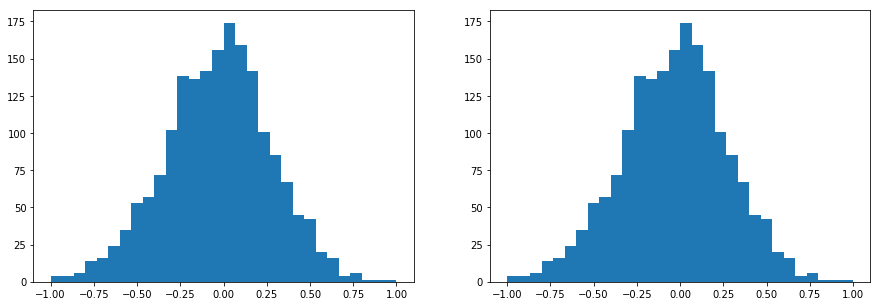

In [26]:
from matplotlib import pyplot as plt
index = 35
plt.figure(figsize=(15,5))
plt.subplot('122')
plt.hist(PREDICTIONS[index]['confidenceValue'],bins='auto')
plt.subplot('121')
plt.hist(_COMPARE_PREDICTIONS[index]['confidenceValue'],bins='auto')
plt.show()

In [35]:
for x in PREDICTIONS[1].iloc[:,1]:
    assert type(x)==float

In [32]:
index = 6
df = pd.DataFrame({'assetCode':PREDICTIONS[index]['assetCode'],'ref':PREDICTIONS[index]['confidenceValue'],'compare':_COMPARE_PREDICTIONS[index]['confidenceValue']})
df[df.iloc[:,1] != df.iloc[:,2]]

,assetCode,ref,compare


In [33]:
for i, ref in enumerate(_COMPARE_PREDICTIONS):
    df = pd.DataFrame({'assetCode':PREDICTIONS[i]['assetCode'],'ref':PREDICTIONS[i]['confidenceValue'],'compare':_COMPARE_PREDICTIONS[i]['confidenceValue']})
    try:
        assert all(df.iloc[:,1] == df.iloc[:,2])
    except:
        print("AssertionError on "+str(i))
    print("ACCEPTED "+str(i))

ACCEPTED 0
ACCEPTED 1
ACCEPTED 2
ACCEPTED 3
ACCEPTED 4
ACCEPTED 5
ACCEPTED 6
ACCEPTED 7
ACCEPTED 8
ACCEPTED 9
ACCEPTED 10
ACCEPTED 11
ACCEPTED 12
ACCEPTED 13
ACCEPTED 14
ACCEPTED 15
ACCEPTED 16
ACCEPTED 17
ACCEPTED 18
ACCEPTED 19
ACCEPTED 20
ACCEPTED 21
ACCEPTED 22
ACCEPTED 23
ACCEPTED 24
ACCEPTED 25
ACCEPTED 26
ACCEPTED 27
ACCEPTED 28
ACCEPTED 29
ACCEPTED 30
ACCEPTED 31
ACCEPTED 32
ACCEPTED 33
ACCEPTED 34
ACCEPTED 35
ACCEPTED 36
ACCEPTED 37
ACCEPTED 38
ACCEPTED 39
ACCEPTED 40
ACCEPTED 41
ACCEPTED 42
ACCEPTED 43
ACCEPTED 44
ACCEPTED 45
ACCEPTED 46


In [84]:
compare_X_live = pk.load(open('../pickle/rolling_dataset_1.pkl','rb'))

In [85]:
ref_X_live = pk.load(open('../pickle/_ref_rolling_dataset_1.pkl','rb'))

In [95]:
compare_X_live.columns[9]

'returnsClosePrevMktres10'

In [90]:
compare_X_live.iloc[8][9]

0.0048455803509486195

In [91]:
ref_X_live.iloc[8][9]

0.06736583038573696

In [96]:
days[1][0].iloc[8]['returnsClosePrevMktres10']

nan